This is a simple Vasicek model of interest rate paths, from which zero-coupon bond prices are then calculated.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Vasicek model parameters
r0 = 0.03  # Initial interest rate
kappa = 0.15  # Speed of mean reversion
theta = 0.05  # Long-term mean interest rate
sigma = 0.01  # Volatility of interest rate
T = 1.0  # Time to maturity for the bond
dt = 1/252  # Time step (daily)
N = int(T / dt)  # Number of time steps
M = 1000  # Number of paths to simulate

In [61]:
# Function to simulate interest rate paths
def simulate_vasicek(r0, kappa, theta, sigma, T, dt, M):
    dt_sqrt = np.sqrt(dt)
    rates = np.zeros((M, N + 1))
    rates[:, 0] = r0
    for t in range(1, N + 1):
        dw = np.random.normal(0, dt_sqrt, M)
        rates[:, t] = rates[:, t-1] + kappa * (theta - rates[:, t-1]) * dt + sigma * dw
    return rates

# Function to price a zero-coupon bond using the Vasicek model
def price_zero_coupon_bond(rates, kappa, theta, sigma, T):
    B = (1 - np.exp(-kappa * T)) / kappa
    A = ((theta - ((sigma**2) / (2 * kappa**2))) * (B - T) - (sigma**2) / (4 * kappa) * B**2)
    bond_prices = np.exp(A - B * rates[:, -1])
    return bond_prices


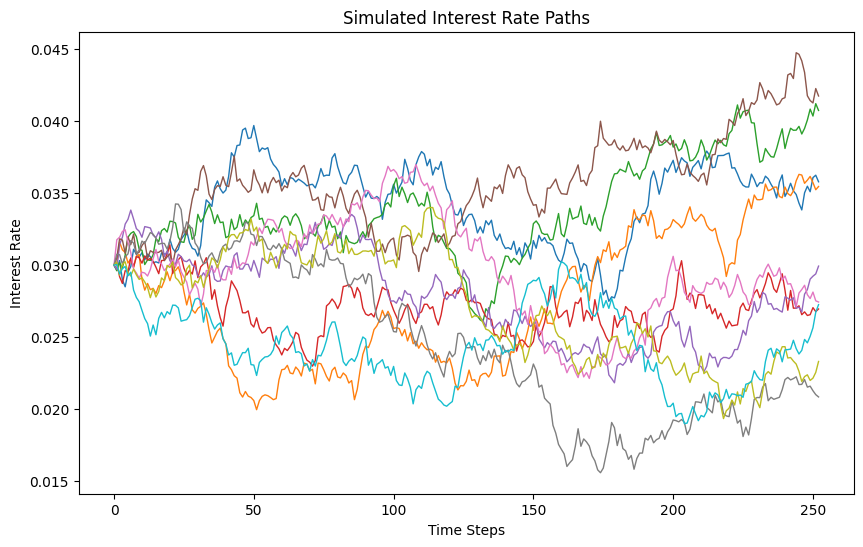

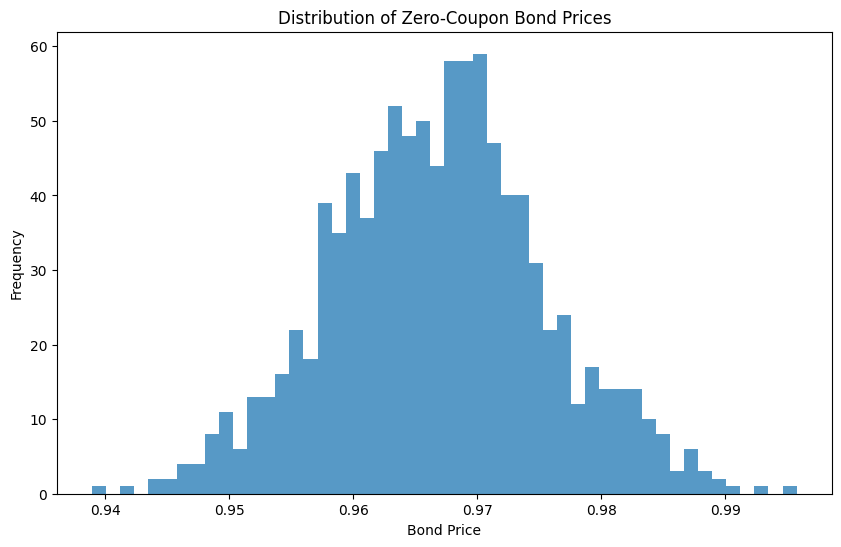

In [66]:
# Simulate interest rate paths
rates = simulate_vasicek(r0, kappa, theta, sigma, T, dt, M)

# Price the zero-coupon bond based on simulated paths
bond_prices = price_zero_coupon_bond(rates, kappa, theta, sigma, T)

# Plot some interest rate paths
plt.figure(figsize=(10, 6))
for i in range(min(10, M)):  # Plot up to 10 paths
    plt.plot(rates[i], lw=1)
plt.title('Simulated Interest Rate Paths')
plt.xlabel('Time Steps')
plt.ylabel('Interest Rate')
plt.show()

# Plot the distribution of bond prices
plt.figure(figsize=(10, 6))
plt.hist(bond_prices, bins=50, alpha=0.75)
plt.title('Distribution of Zero-Coupon Bond Prices')
plt.xlabel('Bond Price')
plt.ylabel('Frequency')
plt.show()